In [48]:
%reload_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Animal_pose import Animal_pose
from spikeA.Session import Session
from spikeA.Dat_file_reader import Dat_file_reader
from spikeA.Intervals import Intervals
from spikeA.Spike_train import Spike_train
from spikeA.Spike_waveform import Spike_waveform
from tqdm import tqdm
import os.path
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import spikeA.spatial_properties
import cv2
from scipy import signal

In [49]:
with open(f"/home/maryam/Desktop/Hackaton/ses.pickle", 'rb') as loaded_ses_file:
    ses = pickle.load(loaded_ses_file)
with open(f"/home/maryam/Desktop/Hackaton/spatial_auto.pickle", 'rb') as loaded_ses_file:
    auto = pickle.load(loaded_ses_file)

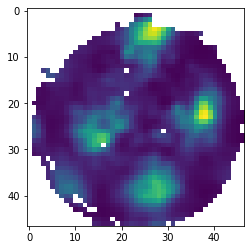

In [50]:
rate_map = ses.cg.neuron_list[1].spatial_properties.firing_rate_map
plt.imshow(rate_map)

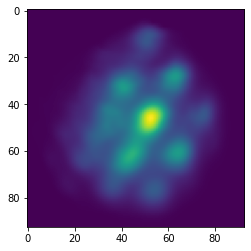

In [51]:
plt.imshow(auto)

To get the spatial autocorrelation manually

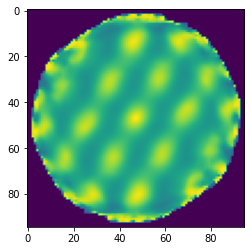

In [52]:
rate_map[np.isnan(rate_map)]=-1
auto_array = np.zeros((2*rate_map.shape[0]+1,2*rate_map.shape[1]+1))
spikeA.spatial_properties.map_autocorrelation_func(rate_map,auto_array)
plt.imshow(auto_array)

To get the spatial autocorrelation via spikeA function

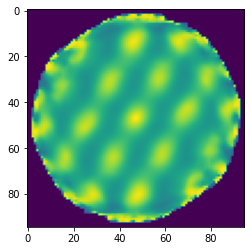

In [53]:
ses.cg.neuron_list[1].set_spatial_properties(ses.ap)
ses.cg.neuron_list[1].spatial_properties.firing_rate_map_2d()
ses.cg.neuron_list[1].spatial_properties.spatial_autocorrelation_map_2d()
plt.imshow(ses.cg.neuron_list[1].spatial_properties.spatial_autocorrelation_map)

get the doughnut

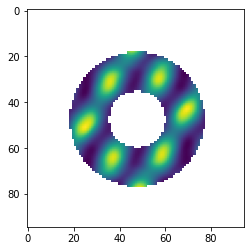

In [54]:
ses.cg.neuron_list[1].set_spatial_properties(ses.ap)
ses.cg.neuron_list[1].spatial_properties.firing_rate_map_2d()
ses.cg.neuron_list[1].spatial_properties.spatial_autocorrelation_map_2d()
ses.cg.neuron_list[1].spatial_properties.spatial_autocorrelation_field_detection()
ses.cg.neuron_list[1].spatial_properties.calculate_doughnut()
plt.imshow(ses.cg.neuron_list[1].spatial_properties.doughnut)

Rotate the doughnut

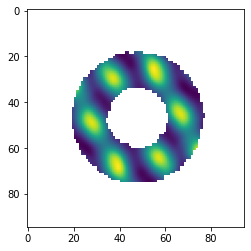

In [55]:
doughnut = ses.cg.neuron_list[1].spatial_properties.doughnut
# get the center of the image
(h, w) = doughnut.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate by 60°, same scale
M = cv2.getRotationMatrix2D((cX, cY), 60, 1.0)
rotated = cv2.warpAffine(doughnut, M, (w, h), borderValue = np.nan)
plt.imshow(rotated)

function to get the cross correlation between the images 

In [56]:
from scipy.stats import pearsonr
def map_cor(a,b):
    """
    Correlation coefficient between two firing rate maps    Arguments:
    a: 2D np.array (map1)
    b: 2D np.array (map2)    Returns:
    Pearson correlation coefficient between a and b
    """
    a = a.flatten()
    b = b.flatten()
    indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
    r,p = pearsonr(a[indices],b[indices])
    return r

In [57]:
correlation = map_cor(doughnut, rotated)
correlation

0.4632319510155155

In [58]:
ses.cg.neuron_list[1].spatial_properties.correlation_from_doughnut_rotation(35)

-0.29983453843645397

In [64]:
ses.cg.neuron_list[1].spatial_properties.grid_score()

0.7590208966158141